# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
!wget https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_month_2023-05.json

--2023-06-26 14:54:36--  https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_month_2023-05.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2007 (2.0K) [text/plain]
Saving to: ‘plant02_month_2023-05.json’

plant02_month_2023- 100%[===================>]   1.96K  --.-KB/s    in 0s      

2023-06-26 14:54:36 (22.6 MB/s) - ‘plant02_month_2023-05.json’ saved [2007/2007]



In [3]:
base_path = './'

In [4]:
import json
ffn = os.path.join(base_path, 'plant02_month_2023-05.json')
with open(ffn, 'r') as f:
    data = json.load(f)


In [5]:
data = data['data']

In [6]:
data.keys()

dict_keys(['capacity', 'date', 'day_e', 'deg4kw', 'inv_cap', 'inv_e', 'sun', 'total_e'])

### 畫出整廠的發電

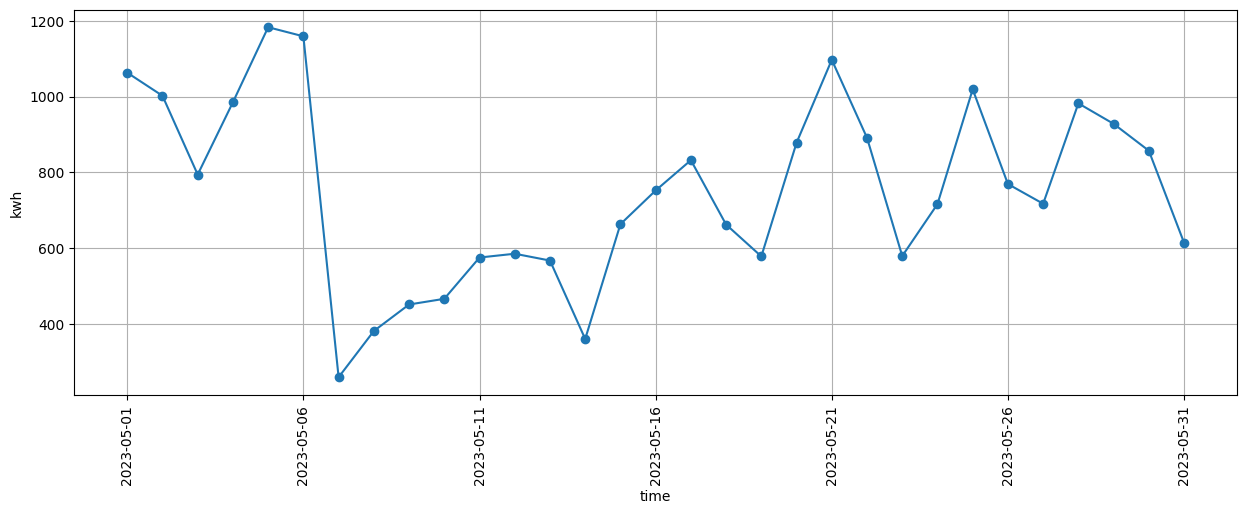

In [7]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.show()

- 用plotly

In [8]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['date']
    ,total_e = data['total_e']
))
fig = px.line(df, x="time", y='total_e', title="Month Trend", markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="kWh"
)

fig.show()



### 和日發電量一樣
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

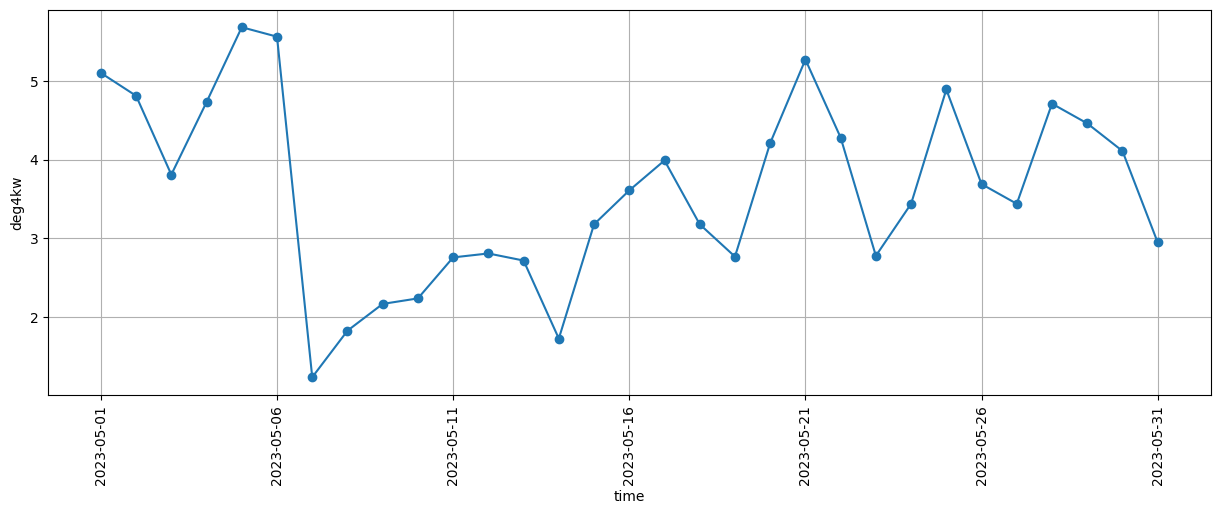

In [9]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.show()

- 用plotly

In [10]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['date']
    ,deg4kw = data['deg4kw']
))
fig = px.line(df, x="time", y='deg4kw', title="Month Trend", markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="每kW發電度數"
)

fig.show()



### 把日照的資訊加進來

In [11]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

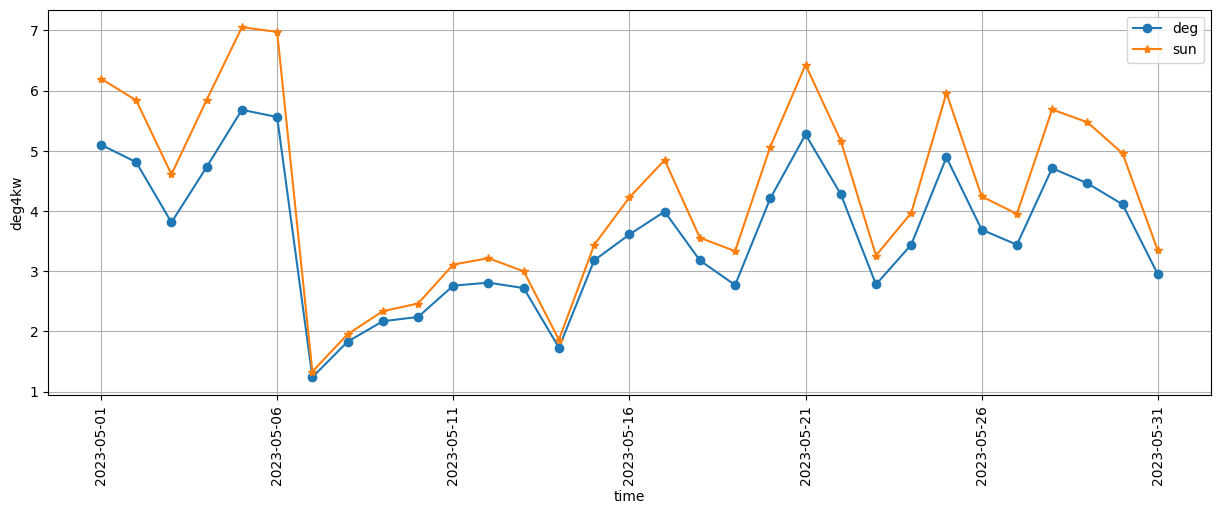

In [12]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o', label='deg')
plt.plot(data['date'], data['sun'], '-*', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.legend()
plt.show()

- 用plotly

In [13]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['date']
    ,deg4kw = data['deg4kw']
    ,sun = data['sun']
))
fig = px.line(df, x="time", y=['deg4kw', 'sun'], title="Month Trend", markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="每kW發電度數"
)

fig.show()



### 每一台都發電的很好嗎?

In [14]:
day_e = data['day_e'].copy()
for n in range(len(day_e)):
    for i in range(len(day_e[n])):
        day_e[n][i]/=data['inv_cap'][n]

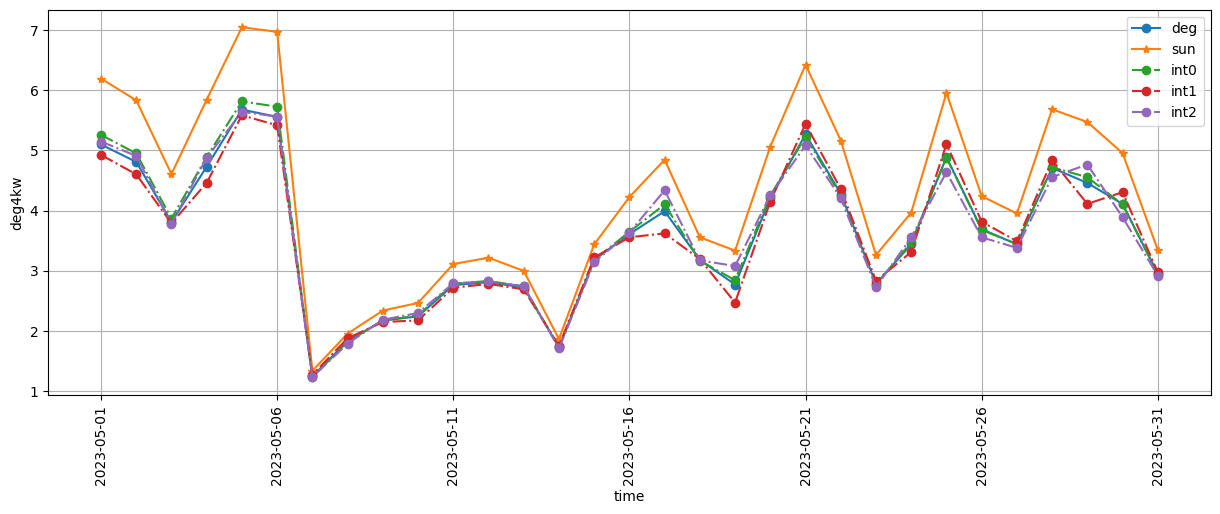

In [15]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o', label='deg')
plt.plot(data['date'], data['sun'], '-*', label='sun')
for n in range(len(day_e)):
    plt.plot(data['date'], day_e[n], '-.o', label='int'+str(n))
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.legend()
plt.show()

- 用plotly

In [16]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    time = data['date']
    ,deg4kw = data['deg4kw']
    ,sun = data['sun']
))
for n in range(len(day_e)):
    inv_name = 'inv_'+str(n)
    df[inv_name] = day_e[n]

fig = px.line(df, x="time", y=['deg4kw', 'sun', 'inv_0', 'inv_1', 'inv_2']
              , title="Month Trend", markers=True)
fig.update_layout(
    xaxis_title="Date", yaxis_title="每kW發電度數"
)

fig.show()
